In [8]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import operator
from matplotlib import pyplot as plt
import os
import random
os.path.isfile('/Users/16786/Desktop/wine.data')

df= pd.read_csv('/Users/16786/Desktop/wine.data')
df.columns = [ 'Alcohol', 'Malic acid', 'Ash', 'alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
'Proanthocyanins', 'olor intensity', 'Hue', 'OD280', 'Proline', 'isTrain']
#df.columns = ['sepal length', 'sepal width', ' petal length', 'petal width', 'FlowerClass']
#seperate aproximently 25% out to be in the test set with which sample goes in each set being random
df['isTrain'] = np.random.uniform(0,1,len(df)) <= .75
df.head(10)


,Alcohol,Malic acid,Ash,alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,olor intensity,Hue,OD280,Proline,isTrain
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,True
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,False
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,True
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,False
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,False
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,False
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,False
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,True
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,True
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,True


In [9]:
#adjusting the alcohol classes to start at 0 instead of 1.
for x in range (0,len(df)):
    if df.iloc[x,0] == 1: 
        df.iloc[x,0] = 0
    if df.iloc[x,0] == 2: 
        df.iloc[x,0] = 1
    if df.iloc[x,0] == 3: 
        df.iloc[x,0] = 2
#df.head(100)
#seperating train and test into two different dataframes for time effecency 
train, test = df[df['isTrain']==True], df[df['isTrain']==False]
#lengths of each set this will change with every run
print('length of train set ' + str(len(train)))
print('length of test set '+ str(len(test)))
print((train[0:0+1]).iloc[0,4])
df.head(5)

length of train set 134
length of test set 43
11.2


,Alcohol,Malic acid,Ash,alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,olor intensity,Hue,OD280,Proline,isTrain
0,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,True
1,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,False
2,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,True
3,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,False
4,0,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,False


In [10]:
#simple euclidian distance function feed in two dataframe rows to compare and the lenght of each feature set,
#output the euclidean distance between the two rows of features
def euclidean_distance(a, b, length):
    dist = 0
    for x in range (1, length-1):
        dist += pow((a.iloc[0,x] - b.iloc[0,x]), 2)
        
    return math.sqrt(dist)

In [11]:
#finds the k nearest neigbors to a test set entry. inputs, the full training set, one row of test features, the number of neigbors being found
#output a list containing the class of the k nearest neighbors to the test entry
def get_k_nearest_neibors(training_set, test_entry, k):
    dist_set = []
    niegbors = []
    
    for x in range (1, len(train)-1):
         #find Euclidean_distance
        this_dist = euclidean_distance(train[x:x+1], test_entry, 13)
        #pair that euclidean distance with the class value of the test point it came from
        dist_set.append((this_dist, training_set[x:x+1].iloc[0,0]))
    dist_set.sort(key=operator.itemgetter(0))
    for n in range (0, k):
        #add k niegbors value to the output
         niegbors.append(dist_set[n][1])
    #print(niegbors)
    return niegbors

In [12]:
#calulates the accuracy by comparing a list of the predicted classes with a list of the true classes
#output a sum of the number of correctly identifyed  classes
def accuracy_calc(predicted, real):
    correct = 0
    for x in range (0, len(real)):
        if predicted[x] == real[x:x+1].iloc[0,0]:
            correct += 1
    return correct

In [13]:
list_of_accuracys = []
list_of_accuracys_train = []
#populating a list with nonsence values
for p in range (99):
    list_of_accuracys.append(-1)
    list_of_accuracys_train.append(-1)

In [14]:
def binaryConversion(a):
    sum = 0
    factor = 1
    for x in range(0, 6):
        sum += a[5-x] * factor
        factor = factor * 2
    return sum

In [15]:
a = [1,1,0,0,0,1]
print(binaryConversion(a))

49


In [23]:
test_set_classifications = [0]
for x in range (0, len(test)-1):
        test_set_classifications.append(-1)
#takes 99 different values of k and uses them to preform knn on the test set. accuracys are then calculated and stored in list_of_accuracys.  
iterations = 16
populationSize = 16
numberItems = 6
class_list = [0,0,0]
count = 0
items = [0 for x in range(numberItems)]
fitnessArray = [0 for x in range(populationSize)]
maxCost = 0
items = [0 for x in range(numberItems)]
populationArray = [[0 for x in range(numberItems)] for y in range(populationSize)]
#make n bit arrays each representing a k value ranging from 0 to 64 one will always be added when calculated to insure k is not 0 
for i in range (0, populationSize):
    for n in range(0, numberItems):
        r = random.uniform(0, 1)
        if(r <= .5):
            populationArray[i][n] = 0
        if(r >= .5):
            populationArray[i][n] = 1
for i in range(0, populationSize):
    binp = binaryConversion(populationArray[i])                     
    for x in range (0, len(test)-1):
        nieg = []
        nieg = get_k_nearest_neibors(train, test[x:x+1], binaryConversion(populationArray[i])+1)
        for n in range(0, binaryConversion(populationArray[i])-1):
            for m in range (0,3):
                if nieg[n] == (m):
                    class_list[m] += 1
        test_set_classifications[x] = (class_list.index(max(class_list)))
        #print(test_set_classifications[x])
        class_list = [0,0,0]
        count += 1
    accuracy = accuracy_calc(test_set_classifications, test)  
    fitnessArray[i] = accuracy/len(test)
    #next is the crossover and determination of what samples get to stay in the population
#the top 1/4 of predictions will get to stay in the population with the bottom 3/4 being crossed
#the center point of the cross will be random
stayNub = int(populationSize/4)
numbNew = len(populationArray) - stayNub
finalSack = [0 for x in range(populationSize)]
a = [0 for x in range(stayNub)]
for m in range(0, iterations):
    for i in range(0, populationSize):
        costA = 0
        weightA = 0
        binp = binaryConversion(populationArray[i])                     
        fitnessArray[i] = costA
        for x in range (0, len(test)-1):
            nieg = []
            nieg = get_k_nearest_neibors(train, test[x:x+1], binaryConversion(populationArray[i])+1)
            for n in range(0, binaryConversion(populationArray[i])-1):
                for m in range (0,3):
                    if nieg[n] == (m):
                        class_list[m] += 1
            test_set_classifications[x] = (class_list.index(max(class_list)))
            #print(test_set_classifications[x])
            class_list = [0,0,0]
            count += 1
    accuracy = accuracy_calc(test_set_classifications, test)  
    fitnessArray[i] = accuracy/len(test)
    if(max(fitnessArray) > maxCost):
        maxCost = max(fitnessArray)
        finalSack = populationArray[fitnessArray.index(max(fitnessArray))]
                #preserve the current best cost and items 
        items = populationArray[fitnessArray.index(max(fitnessArray))]
    
for i in range(0, stayNub):
    a[i] = fitnessArray.index(max(fitnessArray))
    fitnessArray[fitnessArray.index(max(fitnessArray))] = -1
            
    #preserve the current best cost and items 
    #do the crossover 
    #pick random point to swap from
    r = int(random.uniform(1, numberItems-1))
    temp1 = [0 for x in range(0, r)]
    temp2 = [0 for x in range(r, numberItems)]
    temp3 = [0 for x in range(0, r)]
    temp4 = [0 for x in range(r, numberItems)]
    temp5 = [0 for x in range(0, len(a))]
for i in range(0, len(a)):
    temp5[i] = populationArray[a[i]]
for i in range(0, populationSize-1):
    r1 = int(random.uniform(0, numberItems-1))
    r2 = r1+1
    temp1 = populationArray[r1][0:r]
    temp2 = populationArray[r2][r:len(populationArray)]
    temp3 = populationArray[r1][0:r]
    temp4 = populationArray[r2][r:len(populationArray)]
        
    populationArray[i] = temp1+temp4
for i in range(0, len(a)):
    populationArray[a[i]] = temp5[i]
        
# preform mutations
for i in range(0, populationSize):
    for n in range(0, numberItems):
        r = random.uniform(0, 1)
        if(r <= .1):
            k = populationArray[i][n]
            if(k == 1):
                populationArray[i][n] = 0
            if(k == 0):
                populationArray[i][n] = 1
print(maxCost)

0.627906976744186


In [ ]:
list_1_to_49 = []
print(list_of_accuracys)
for x in range (0,99):
    list_1_to_49.append(x+1)
     #A graph showing the results of the test set accuracy of the first 99 k values
plt.plot(list_1_to_49, list_of_accuracys)    
plt.xlabel('k value') 
# naming the y axis 
plt.ylabel('accuracy') 
plt.show

In [9]:
#test the preformance of train set on train set to test for over under fit

test_set_classifications_train = [0]
for x in range (0, len(train)-1):
        test_set_classifications_train.append(-1)
    #this part functions the same as the test set function above except its testing the training set on its self.
for k in range (1,100):
    
    class_list = [0,0,0]
    count = 0
    for x in range (0, len(train)-1):
        nieg = []
        nieg = get_k_nearest_neibors(train, train[x:x+1], k)
        for n in range(0, k):
            for m in range (0,3):
                if nieg[n] == (m):
                    class_list[m] += 1
        test_set_classifications_train[x] = (class_list.index(max(class_list)))
        
        class_list = [0,0,0]
        count += 1
    #print(test_set_classifications_train)
    list_of_accuracys_train[k-1] = accuracy_calc(test_set_classifications_train, train)
    list_of_accuracys_train[k-1] = list_of_accuracys_train[k-1]/len(train)

[0.9921875, 0.90625, 0.9140625, 0.8671875, 0.8671875, 0.84375, 0.8203125, 0.78125, 0.765625, 0.7734375, 0.75, 0.7578125, 0.7578125, 0.734375, 0.7578125, 0.7421875, 0.734375, 0.7109375, 0.7109375, 0.7109375, 0.703125, 0.6953125, 0.6484375, 0.6640625, 0.6796875, 0.6796875, 0.6640625, 0.6640625, 0.6484375, 0.6328125, 0.65625, 0.65625, 0.6484375, 0.6796875, 0.65625, 0.671875, 0.640625, 0.6328125, 0.625, 0.625, 0.6171875, 0.609375, 0.609375, 0.578125, 0.5859375, 0.6015625, 0.6015625, 0.609375, 0.6171875, 0.609375, 0.6171875, 0.5859375, 0.5546875, 0.5703125, 0.5625, 0.5625, 0.5703125, 0.5703125, 0.546875, 0.546875, 0.546875, 0.53125, 0.5390625, 0.515625, 0.4921875, 0.5, 0.5, 0.5234375, 0.53125, 0.53125, 0.5390625, 0.53125, 0.5234375, 0.5234375, 0.515625, 0.515625, 0.5078125, 0.515625, 0.5078125, 0.5078125, 0.5078125, 0.5078125, 0.515625, 0.5, 0.5, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.484375, 0.4765625, 0.4765625, 0.484375, 0.484375, 0.484375, 0.4765625, 0.484375, 0.476562

<function matplotlib.pyplot.show(*args, **kw)>

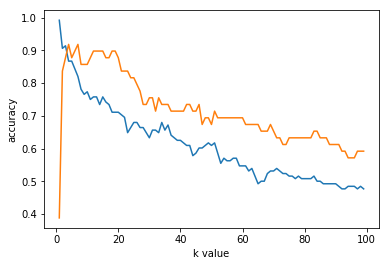

In [10]:
print(list_of_accuracys_train)
plt.plot(list_1_to_49, list_of_accuracys_train, label = 'training data')
plt.plot(list_1_to_49, list_of_accuracys, label = 'testing data')
plt.xlabel('k value') 
# naming the y axis 
# A table comparing the test and training set accuracys,it show that a k value of around 5 is the most optimal.
plt.ylabel('accuracy') 
plt.show

In [11]:
print(list_of_accuracys_train)

[0.9921875, 0.90625, 0.9140625, 0.8671875, 0.8671875, 0.84375, 0.8203125, 0.78125, 0.765625, 0.7734375, 0.75, 0.7578125, 0.7578125, 0.734375, 0.7578125, 0.7421875, 0.734375, 0.7109375, 0.7109375, 0.7109375, 0.703125, 0.6953125, 0.6484375, 0.6640625, 0.6796875, 0.6796875, 0.6640625, 0.6640625, 0.6484375, 0.6328125, 0.65625, 0.65625, 0.6484375, 0.6796875, 0.65625, 0.671875, 0.640625, 0.6328125, 0.625, 0.625, 0.6171875, 0.609375, 0.609375, 0.578125, 0.5859375, 0.6015625, 0.6015625, 0.609375, 0.6171875, 0.609375, 0.6171875, 0.5859375, 0.5546875, 0.5703125, 0.5625, 0.5625, 0.5703125, 0.5703125, 0.546875, 0.546875, 0.546875, 0.53125, 0.5390625, 0.515625, 0.4921875, 0.5, 0.5, 0.5234375, 0.53125, 0.53125, 0.5390625, 0.53125, 0.5234375, 0.5234375, 0.515625, 0.515625, 0.5078125, 0.515625, 0.5078125, 0.5078125, 0.5078125, 0.5078125, 0.515625, 0.5, 0.5, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.484375, 0.4765625, 0.4765625, 0.484375, 0.484375, 0.484375, 0.4765625, 0.484375, 0.476562